# Exploratory Data Analysis

In [201]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

sns.set_theme(style="darkgrid")


## Data Loading

In [5]:
airports = pd.read_csv('./data/airports.csv', sep=',')
airlines = pd.read_csv('./data/airlines.csv')

# data to test and train on
flights_test = pd.read_csv('./data/flights_test.csv')
flights_train = pd.read_csv('./data/flights_train.csv')

# format on how to submit you results
submit_sample = pd.read_csv('./data/submit_sample.csv')

In [102]:
unique_origin_airports = flights_train['ORIGIN_AIRPORT'].drop_duplicates()
unique_destination_airports = flights_train['DESTINATION_AIRPORT'].drop_duplicates()

connections = flights_train[['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']]
unique_connections = connections.drop_duplicates()

In [103]:
print(len(unique_origin_airports))
print(len(unique_destination_airports))
print(len(unique_connections))

322
322
4512


id  YEAR  MONTH   DAY  DAY_OF_WEEK  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                         
ABE            ATL                   481   481    481   481          481   
               DTW                   384   384    384   384          384   
               ORD                   303   303    303   303          303   
ABI            DFW                  1238  1238   1238  1238         1238   
ABQ            ATL                   373   373    373   373          373   
...                                  ...   ...    ...   ...          ...   
XNA            ORD                  1314  1314   1314  1314         1314   
               SLC                     1     1      1     1            1   
YAK            CDV                   176   176    176   176          176   
               JNU                   176   176    176   176          176   
YUM            PHX                  1024  1024   1024  1024         1024   

                                    AIRLINE  FLIGHT_NUMBER  TAIL_NUMBER  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                        
ABE            ATL                      481            481          481   
               DTW                      384            384          384   
               ORD                      303            303          303   
ABI            DFW                     1238           1238         1238   
ABQ            ATL                      373            373          373   
...                                     ...            ...          ...   
XNA            ORD                     1314           1314         1314   
               SLC                        1              1            1   
YAK            CDV                      176            176          176   
               JNU                      176            176          176   
YUM            PHX                     1024           1024         1024   

                                    SCHEDULED_DEPARTURE  DEPARTURE_TIME  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                        
ABE            ATL                                  481             481   
               DTW                                  384             384   
               ORD                                  303             303   
ABI            DFW                                 1238            1238   
ABQ            ATL                                  373             373   
...                                                 ...             ...   
XNA            ORD                                 1314            1314   
               SLC                                    1               1   
YAK            CDV                                  176             176   
               JNU                                  176             176   
YUM            PHX                                 1024            1024   

                                    TAXI_OUT  WHEELS_OFF  SCHEDULED_TIME  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                         
ABE            ATL                       481         481             481   
               DTW                       384         384             384   
               ORD                       303         303             303   
ABI            DFW                      1238        1238            1238   
ABQ            ATL                       373         373             373   
...                                      ...         ...             ...   
XNA            ORD                      1314        1314            1314   
               SLC                         1           1               1   
YAK            CDV                       176         176             176   
               JNU                       176         176             176   
YUM            PHX                      1024        1024            1024   

                                    DISTANCE  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  
ORIGIN_AIRPORT DESTINATION_

In [12]:
flights_train.sort_values(by='SCHEDULED_DEPARTURE')


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY
967856,967856,2015,3,8,7,AA,258,N3BMAA,LAX,MIA,1,2358.0,22.0,20.0,288.0,2342,849,0.0
967857,967857,2015,3,8,7,AA,1674,N3KXAA,LAS,MIA,1,804.0,20.0,824.0,264.0,2174,825,500.0
967858,967858,2015,3,8,7,NK,520,N509NK,LAS,MCI,1,2351.0,11.0,2.0,165.0,1139,546,-29.0
2686483,2686483,2015,6,23,2,NK,298,N630NK,LAS,IAH,3,128.0,16.0,144.0,177.0,1222,500,84.0
2737154,2737154,2015,6,26,5,NK,298,N623NK,LAS,IAH,3,222.0,12.0,234.0,177.0,1222,500,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2737148,2737148,2015,6,25,4,UA,1221,N77261,LAX,ORD,2359,2357.0,18.0,15.0,241.0,1744,600,-13.0
2737147,2737147,2015,6,25,4,US,1720,N602AW,PHX,MSP,2359,44.0,9.0,53.0,177.0,1276,456,40.0
2737146,2737146,2015,6,25,4,US,550,N561UW,PHX,BOS,2359,36.0,10.0,46.0,294.0,2300,753,42.0
2456865,2456865,2015,6,8,1,B6,839,N594JB,JFK,BQN,2359,19.0,24.0,43.0,224.0,1576,343,16.0


In [96]:
airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [6]:
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [231]:
def aggregate_date_time(values): 
    year, month, day, time = [int(x) for x in values]
    hour, minutes = int(time/100), time%100
    if(hour == 24): hour = 0
    return datetime.datetime(year, month, day, hour, minutes)

flights_train['scheduled_departure_date_time'] = flights_train[['YEAR', 'MONTH', 'DAY', 'SCHEDULED_DEPARTURE']].apply(lambda x: aggregate_date_time(x), axis=1)
flights_train['departure_date_time'] = flights_train[['YEAR', 'MONTH', 'DAY', 'DEPARTURE_TIME']].apply(lambda x: aggregate_date_time(x), axis=1)
flights_train['scheduled_arrival_date_time'] = flights_train[['YEAR', 'MONTH', 'DAY', 'SCHEDULED_ARRIVAL']].apply(lambda x: aggregate_date_time(x), axis=1)
flights_train.head()


,id,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,...,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,scheduled_departure_date_time,scheduled_arrival_date_time,departure_date_time
0,0,2015,1,1,4,AS,98,N407AS,ANC,SEA,...,2354.0,21.0,15.0,205.0,1448,430,-22.0,2015-01-01 00:05:00,2015-01-01 04:30:00,2015-01-01 23:54:00
1,1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,...,2.0,12.0,14.0,280.0,2330,750,-9.0,2015-01-01 00:10:00,2015-01-01 07:50:00,2015-01-01 00:02:00
2,2,2015,1,1,4,US,840,N171US,SFO,CLT,...,18.0,16.0,34.0,286.0,2296,806,5.0,2015-01-01 00:20:00,2015-01-01 08:06:00,2015-01-01 00:18:00
3,3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,...,15.0,15.0,30.0,285.0,2342,805,-9.0,2015-01-01 00:20:00,2015-01-01 08:05:00,2015-01-01 00:15:00
4,4,2015,1,1,4,AS,135,N527AS,SEA,ANC,...,24.0,11.0,35.0,235.0,1448,320,-21.0,2015-01-01 00:25:00,2015-01-01 03:20:00,2015-01-01 00:24:00


## Visualisation of flight delay on different days of the week from Januray to June

/var/folders/ks/_jlbnqgn7ks2yq2nrk1jy21w0000gp/T/ipykernel_18528/1514046311.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  f = f.groupby(['DAY', 'MONTH'])['DAY', 'MONTH', 'ARRIVAL_DELAY', 'DAY_OF_WEEK'].mean('ARRIVAL_DELAY')


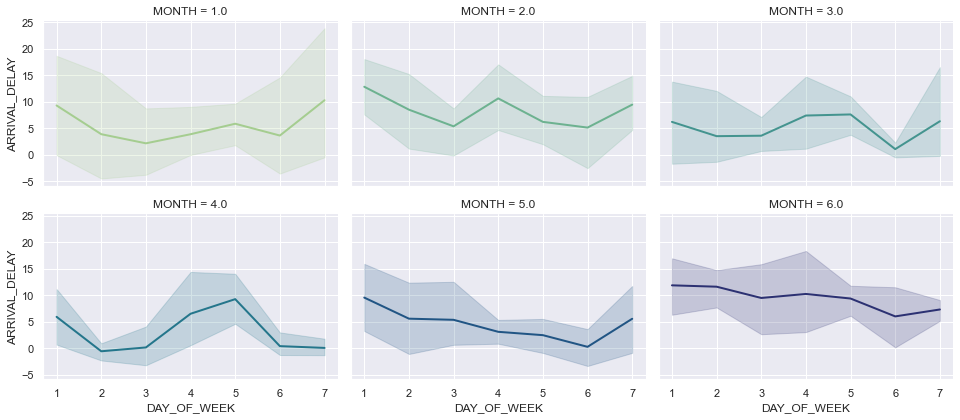

In [233]:
# 7 -> SUNDAY

# f = flights_train[(flights_train['MONTH'] == 3)]
f = flights_train#[(flights_train['ORIGIN_AIRPORT'] == 'LAX')]

f = f.groupby(['DAY', 'MONTH'])['DAY', 'MONTH', 'ARRIVAL_DELAY', 'DAY_OF_WEEK'].mean('ARRIVAL_DELAY')

# Plot each monthly average in an own graph
g = sns.relplot(
    data=f,
    x="DAY_OF_WEEK", y="ARRIVAL_DELAY", col="MONTH", hue="MONTH",
    kind="line", palette="crest", linewidth=2, zorder=5,
    col_wrap=3, height=3, aspect=1.5, legend=False,
)

# trying to display all the other months in the same line plot, as a reference (not working)
# for year, ax in g.axes_dict.items():

#     # Add the title as an annotation within the plot
#     # ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")
#     # Plot every year's time series in the background
#     sns.lineplot(
#         data=f, x="DAY_OF_WEEK", y="ARRIVAL_DELAY", units="MONTH",
#         estimator=None, color=".7", linewidth=1, ax=ax,
#     )


In [234]:
aggregation = ['mean', 'median', 'min', 'max']

f = flights_train[flights_train['ORIGIN_AIRPORT'] == 'LAX'].groupby(['DAY_OF_WEEK', 'MONTH']).agg({'TAXI_OUT': aggregation, 'ARRIVAL_DELAY': aggregation})


## What route has the most delays?

In [235]:
from functools import reduce

def positive_delays_sum(series):
    filteredSeries = list(filter(lambda x: x > 0, series))
    if len(filteredSeries) == 0: return 0
    else: return reduce(lambda x, y: x + y, filteredSeries)


def negative_delays_sum(series):
    filteredSeries = list(filter(lambda x: x <= 0, series))
    if len(filteredSeries) == 0: return 0
    else: return reduce(lambda x, y: x + y, filteredSeries)


def positive_delays_count(series):
    filteredSeries = list(filter(lambda x: x > 0, series))
    return len(filteredSeries)

def negative_delays_count(series):
    filteredSeries = list(filter(lambda x: x <= 0, series))
    return len(filteredSeries)

aggregation = [
    positive_delays_count, 
    negative_delays_count, 
    positive_delays_sum, 
    negative_delays_sum, 
    'max',
    'min', 
    'mean', 
    'median'
]

sums = flights_train.groupby(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']).agg({'ARRIVAL_DELAY': aggregation})  # .add_prefix('ARRIVAL_DELAY_')
sums.columns = ['_'.join(column) for column in sums.columns] # flattening aggregated columns
sums.loc[sums.idxmax()]


ARRIVAL_DELAY_positive_delays_count  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                        
SFO            LAX                                                 2958   
JFK            LAX                                                 2149   
LAX            SFO                                                 2804   
BNA            MOB                                                    1   
BHM            DFW                                                  187   
IAD            TTN                                                    1   
               TTN                                                    1   
               TTN                                                    1   

                                    ARRIVAL_DELAY_negative_delays_count  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                        
SFO            LAX                                                 3740   
JFK            LAX                                                 4378   
LAX            SFO                                                 3735   
BNA            MOB                                                    0   
BHM            DFW                                                  225   
IAD            TTN                                                    0   
               TTN                                                    0   
               TTN                                                    0   

                                    ARRIVAL_DELAY_positive_delays_sum  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                      
SFO            LAX                                            93884.0   
JFK            LAX                                            82616.0   
LAX            SFO                                           102460.0   
BNA            MOB                                               33.0   
BHM            DFW                                            10846.0   
IAD            TTN                                              381.0   
               TTN                                              381.0   
               TTN                                              381.0   

                                    ARRIVAL_DELAY_negative_delays_sum  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                      
SFO            LAX                                           -36552.0   
JFK            LAX                                           -96478.0   
LAX            SFO                                           -38949.0   
BNA            MOB                                                0.0   
BHM            DFW                                            -2563.0   
IAD            TTN                                                0.0   
               TTN                                                0.0   
               TTN                                                0.0   

                                    ARRIVAL_DELAY_max  ARRIVAL_DELAY_min  \
ORIGIN_AIRPORT DESTINATION_AIRPORT                                         
SFO            LAX                              670.0              -40.0   
JFK            LAX                              762.0              -74.0   
LAX            SFO                              482.0              -41.0   
BNA            MOB                               33.0               33.0   
BHM            DFW                             1971.0              -35.0   
IAD            TTN                              381.0              381.0   
               TTN                              381.0              381.0   
               TTN                              381.0              381.0   

                                    ARRIVAL_DELAY_mean  ARRIVAL_DELAY_median  
ORIGIN_AIRPORT DESTINATION_AIRPORT                                            
SFO            LAX                            8.559570                  -2.0  
JFK            LAX                           -2.123793                 -11

## Correlation of the different features

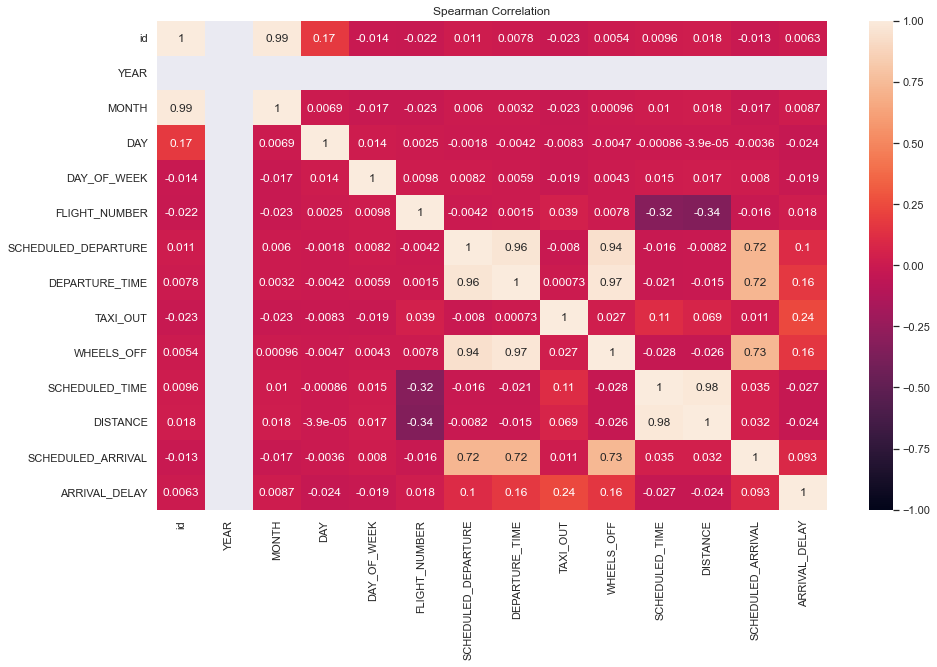

In [254]:
# TODO data cleaning -> unify departure and arrival times

def display_correlation(df):
    r = df.corr(method="pearson")
    plt.figure(figsize=(15, 9))
    heatmap = sns.heatmap(df.corr(), vmin=-1,
                          vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

r_simple = display_correlation(flights_train)


In [249]:
flights_train[['DAY', 'MONTH']]

,DAY,MONTH
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2818548,30,6
2818549,30,6
2818550,30,6
2818551,30,6
